<a href="https://colab.research.google.com/github/chanpaulamol/Image_Processing_Computer_Vision/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
# Access my drive
drive.mount('/content/drive')

Mounted at /content/drive


Import libraries

In [14]:
import cv2 as cv 
from google.colab.patches import cv2_imshow
import numpy as np 
from matplotlib import pyplot as plt

Different Global Thresholds

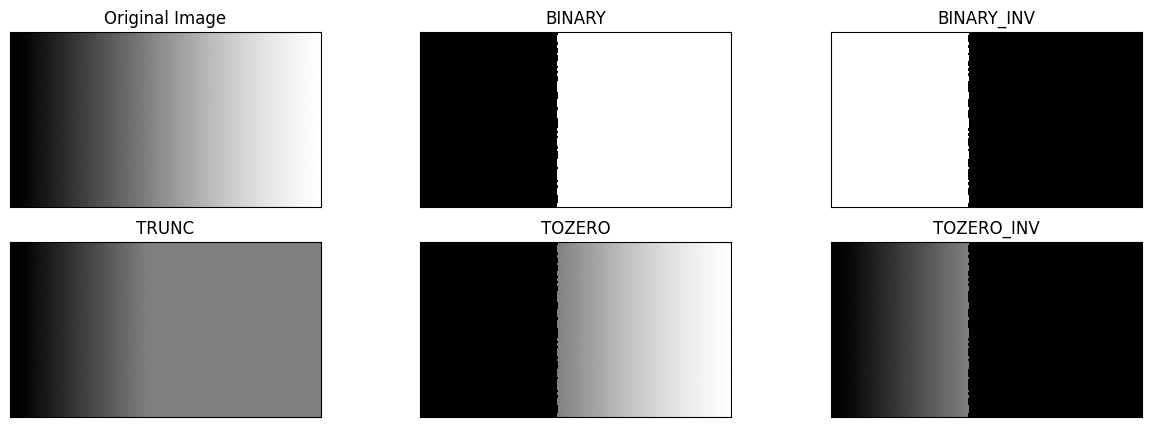

In [20]:
filename = ('/content/drive/MyDrive/PCVK/image_thres/gradient.jpg')
img = cv.imread(filename)
thresh = 127 #nilai Threshold yang ditentukan

# 1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selainitu bernilai 0(hitam)
ret, thresh1 = cv.threshold(img, thresh, 255, cv.THRESH_BINARY)

# 2. thresh2 adalah binary threshold inverse
ret, thresh2 = cv.threshold(img, thresh, 255, cv.THRESH_BINARY_INV)

# 3. Threshold Truncate
ret, thresh3 = cv.threshold(img, thresh, 255, cv.THRESH_TRUNC)

# 4. Threshold Tozero
ret, thresh4 = cv.threshold(img, thresh, 255, cv.THRESH_TOZERO)

# 5. Threshold Tozero Inverse
ret, thresh5 = cv.threshold(img, thresh, 255, cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15,5))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()


Adpative Threshold

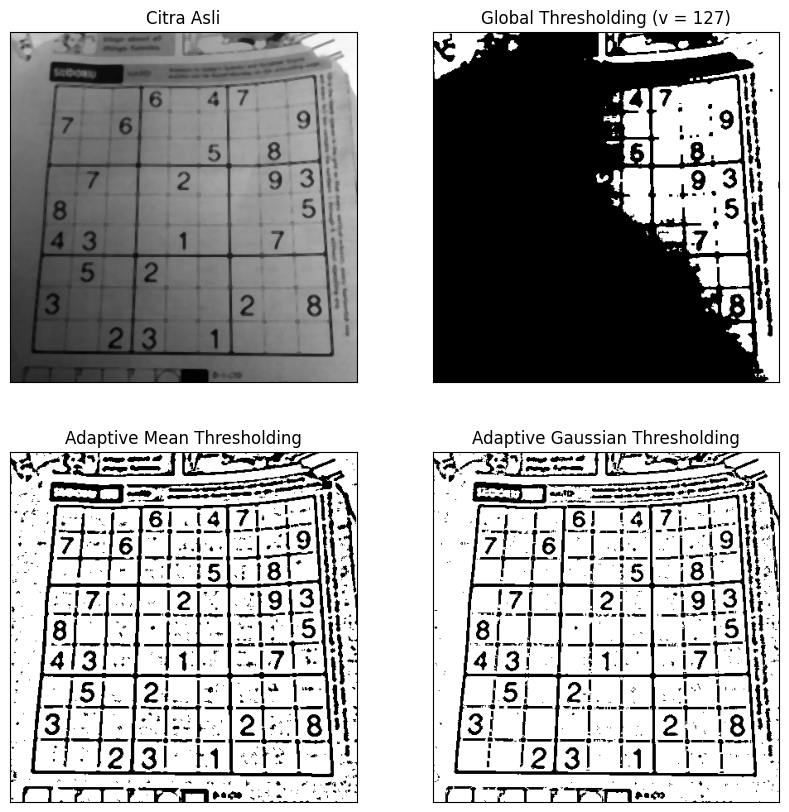

In [21]:
filename = ('/content/drive/MyDrive/PCVK/image_thres/sudoku-original.jpg')
citra = cv.medianBlur(cv.imread(filename), 5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)

thresh = 127
ret, th1 = cv.threshold(gray, thresh, 255, cv.THRESH_BINARY)

th2 = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)

th3 = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

titles = ['Citra Asli', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]

plt.figure(figsize=(10,10))
for i in range(len(citra2)):
    plt.subplot(2, 2, i+1)
    plt.imshow(citra2[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()


Otsu Threshold with the OpenCV library

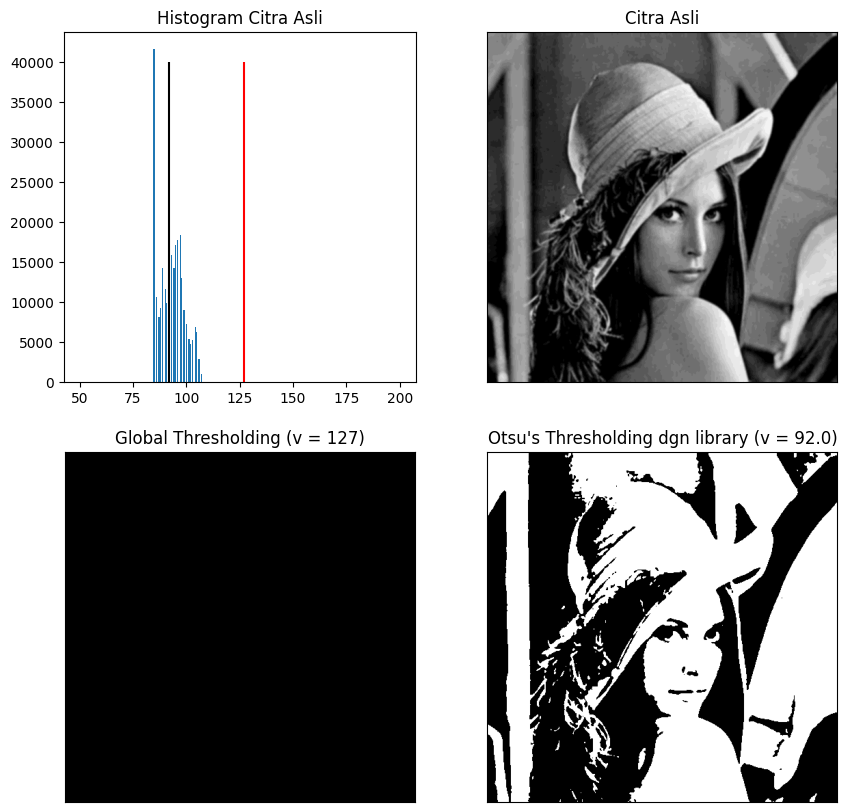

In [22]:
filename = ('/content/drive/MyDrive/PCVK/image_thres/lena_gs_lc2.jpg')
img = cv.imread(filename, 0)
blur = cv.GaussianBlur(img, (5, 5), 0)
thresh = 127

ret, th1 = cv.threshold(blur, thresh, 255, cv.THRESH_BINARY)

ret2, th2 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"

titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]

citra3 = [blur, th1, th2]

plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1), plt.hist(blur.ravel(), 256, [50, 200])
plt.vlines(ret, 0, 40000, colors='red') # garis vertikal merah menunjukkan threshold global 127
plt.vlines(ret2, 0, 40000, colors='black') # garis vertikal hitam menunjukkan threshold hasil otsu's

plt.title('Histogram Citra Asli')

for i in range(len(citra3)):
    plt.subplot(2, 2, i+2), plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()


Otsu's Threshold without Gaussian Filter and using a Guassian Filter

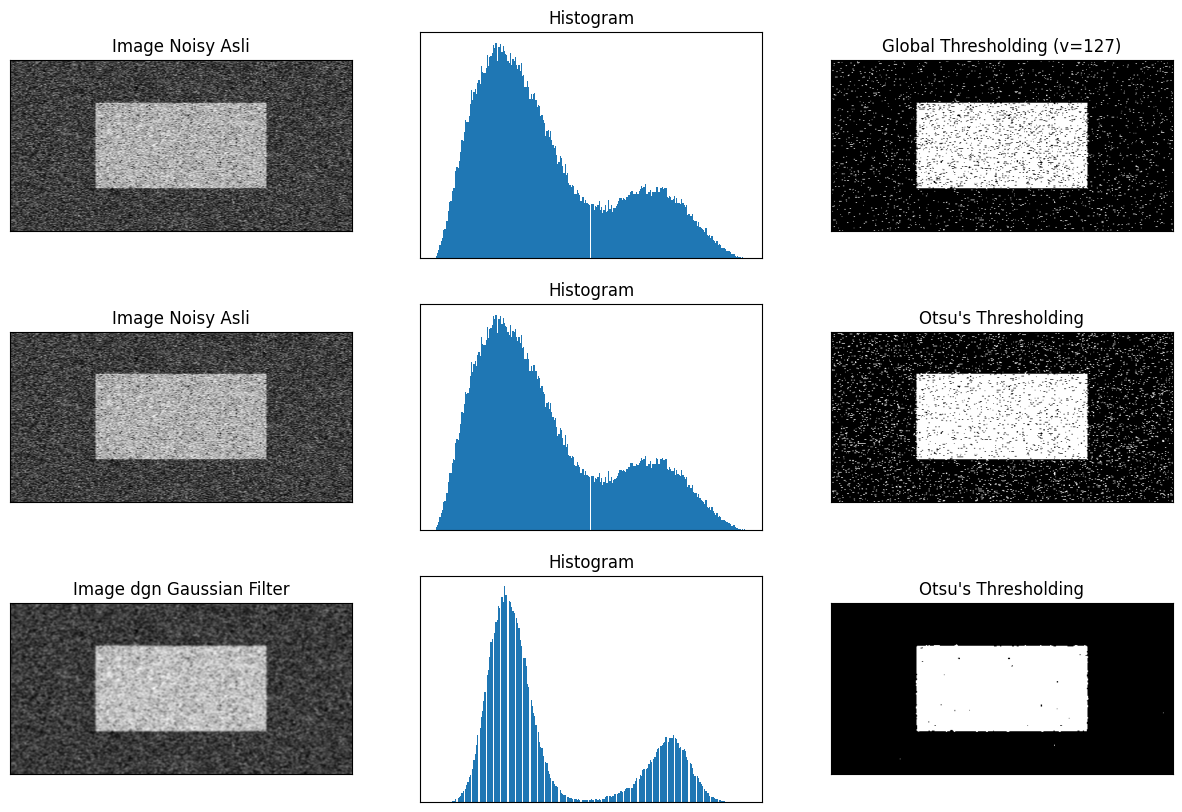

In [23]:
filename = ('/content/drive/MyDrive/PCVK/image_thres/noisy2.png')
img = cv.imread(filename,0)

#Global Thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

#plotting semua image
images = [img, 0, th1,          img, 0, th2,          blur, 0, th3]

titles = ['Image Noisy Asli','Histogram','Global Thresholding (v=127)',          'Image Noisy Asli','Histogram',"Otsu's Thresholding",          'Image dgn Gaussian Filter','Histogram',"Otsu's Thresholding"]

plt.figure(figsize = (15,10))

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

plt.show()


K-means Clustering

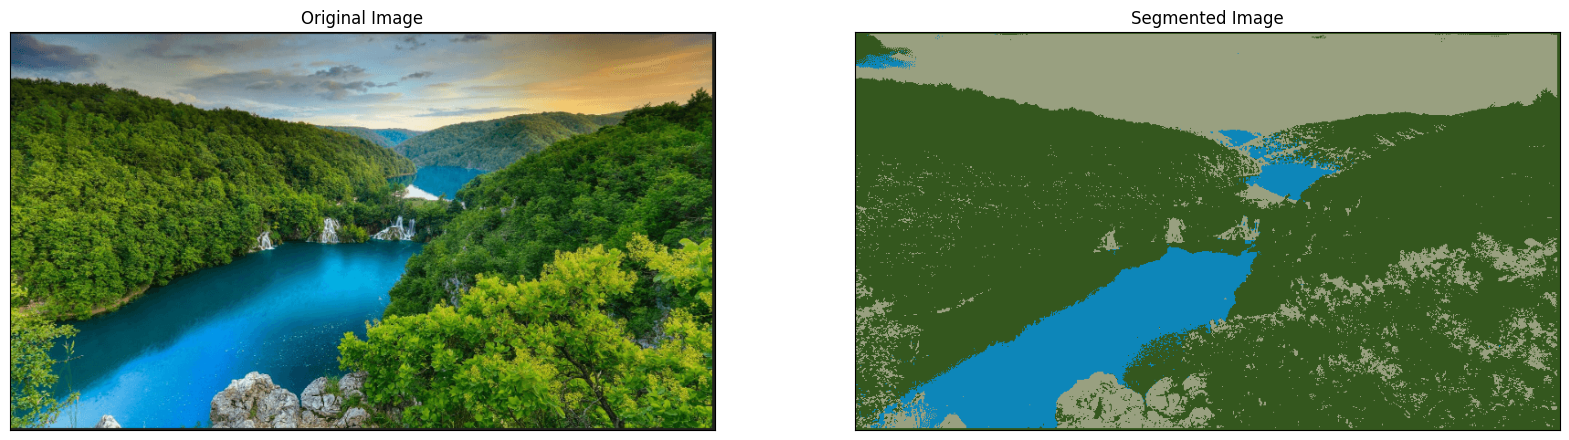

In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# KMeans Image Segmentation
filename = ('/content/drive/MyDrive/PCVK/image_thres/jungle.png')
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

'''
we will use the function cv.kmeans () that asks array 2D as input, while
the image of the original is an array of 3D
Next we need to flatten the input image array
'''
# reshape array to 2D form
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

'''
The condition for stopping Dr. KMeans' iteration is if the centroid has not
shifted too much position between current interaction with the previous iter
ation (convergent). Because the amount of data that is great, we will stop
iterating when the number of iterations = 100 or epsilon (the difference
between the position of the centroid skrg with the position of the centroid
in the iteration before) < 0.2
'''
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

'''
If you look at the original image, there are 3 main colors (green, blue,
and white/orange). For this experiment, we will use 3 clusters for this
image.
'''
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert centroid point to an integer
centers = np.uint8(centers)
# flattening label array
labels = labels.flatten()
# konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# Reshape to the original image
segmented_image = segmented_image.reshape(img.shape)

# plotting the original and segmented image
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1), plt.imshow(img)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(segmented_image)
plt.title("Segmented Image"), plt.xticks([]), plt.yticks([])
plt.show()


(<Axes: >, <matplotlib.image.AxesImage at 0x7f3da00b3ac0>)

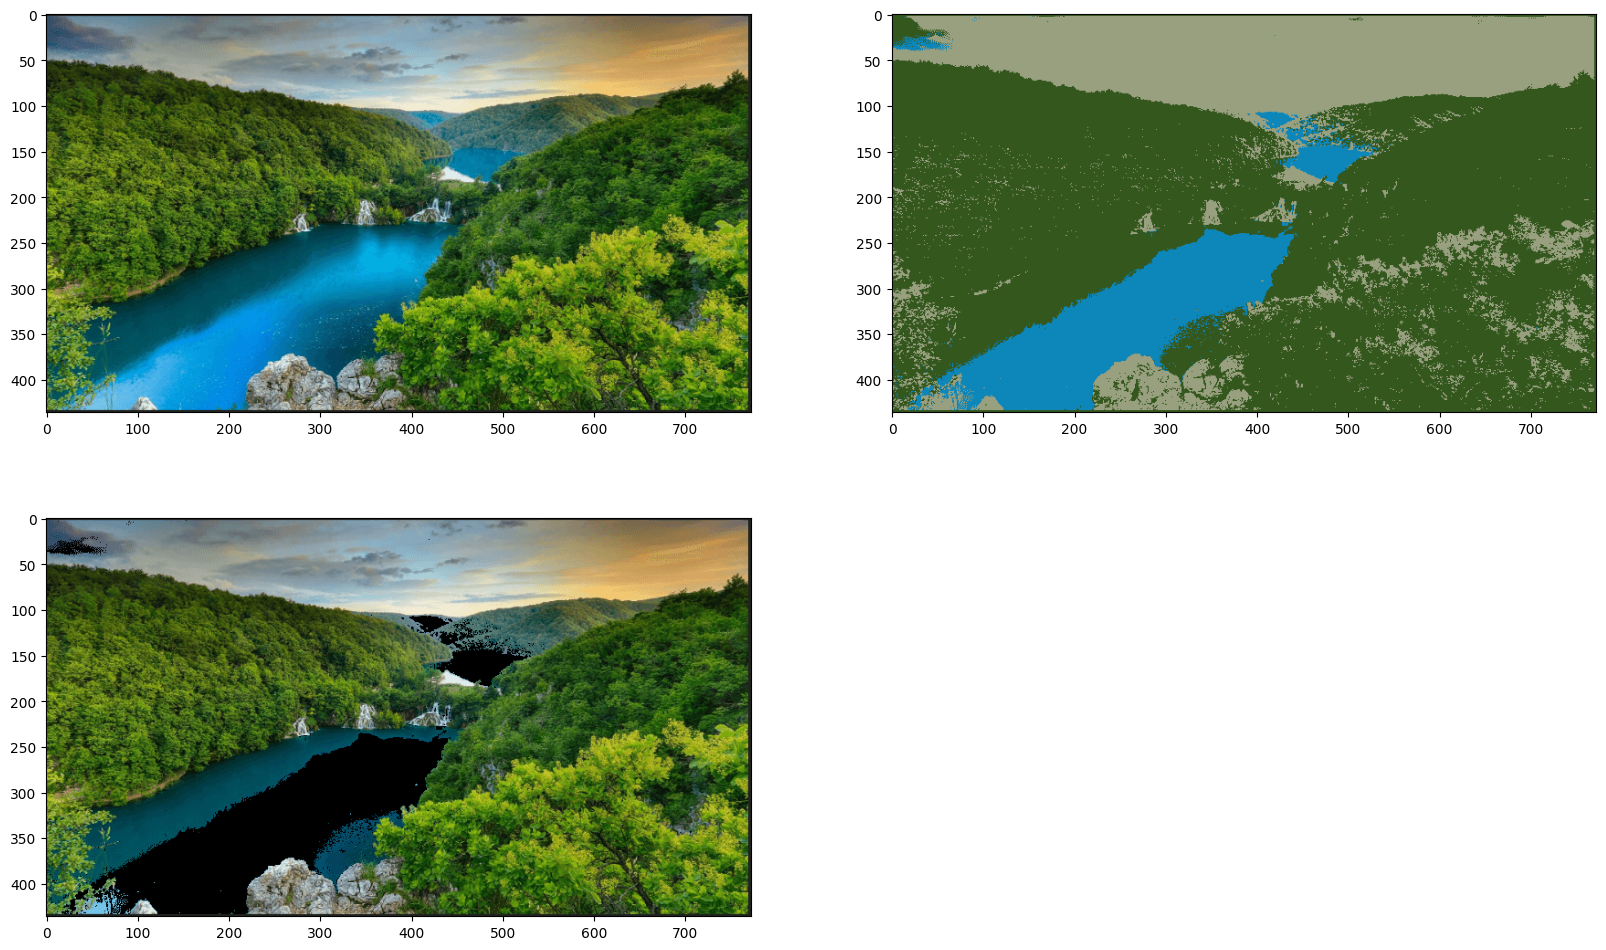

In [26]:
# ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)
plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)

Practicum

Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO,
TOZERO_INV)

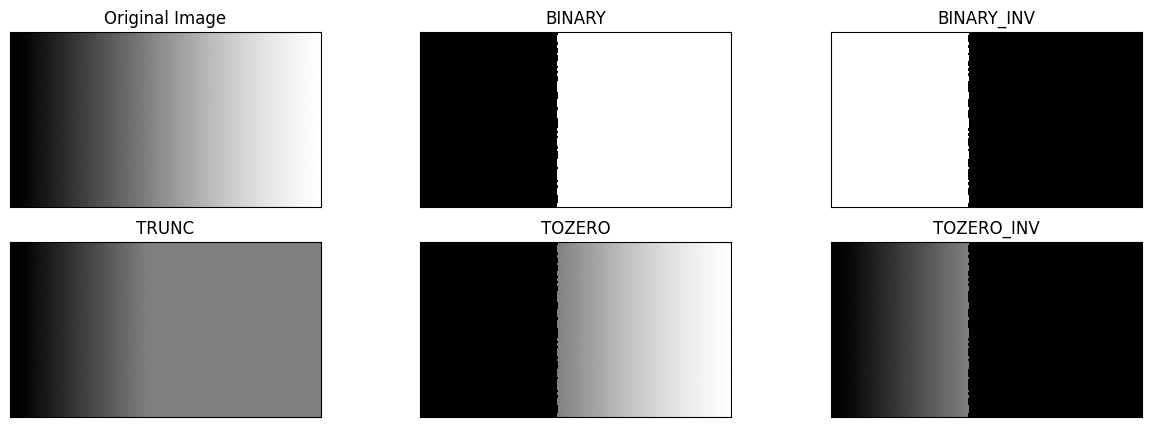

In [27]:
filename = ('/content/drive/MyDrive/PCVK/image_thres/gradient.jpg')
img = cv.imread(filename)
thresh = 127 #nilai Threshold yang ditentukan

# 1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selainitu bernilai 0(hitam)
ret, thresh1 = cv.threshold(img, thresh, 255, cv.THRESH_BINARY)

# 2. thresh2 adalah binary threshold inverse
ret, thresh2 = cv.threshold(img, thresh, 255, cv.THRESH_BINARY_INV)

# 3. Threshold Truncate
ret, thresh3 = cv.threshold(img, thresh, 255, cv.THRESH_TRUNC)

# 4. Threshold Tozero
ret, thresh4 = cv.threshold(img, thresh, 255, cv.THRESH_TOZERO)

# 5. Threshold Tozero Inverse
ret, thresh5 = cv.threshold(img, thresh, 255, cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15,5))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

Otsu Thresholding without using the Library

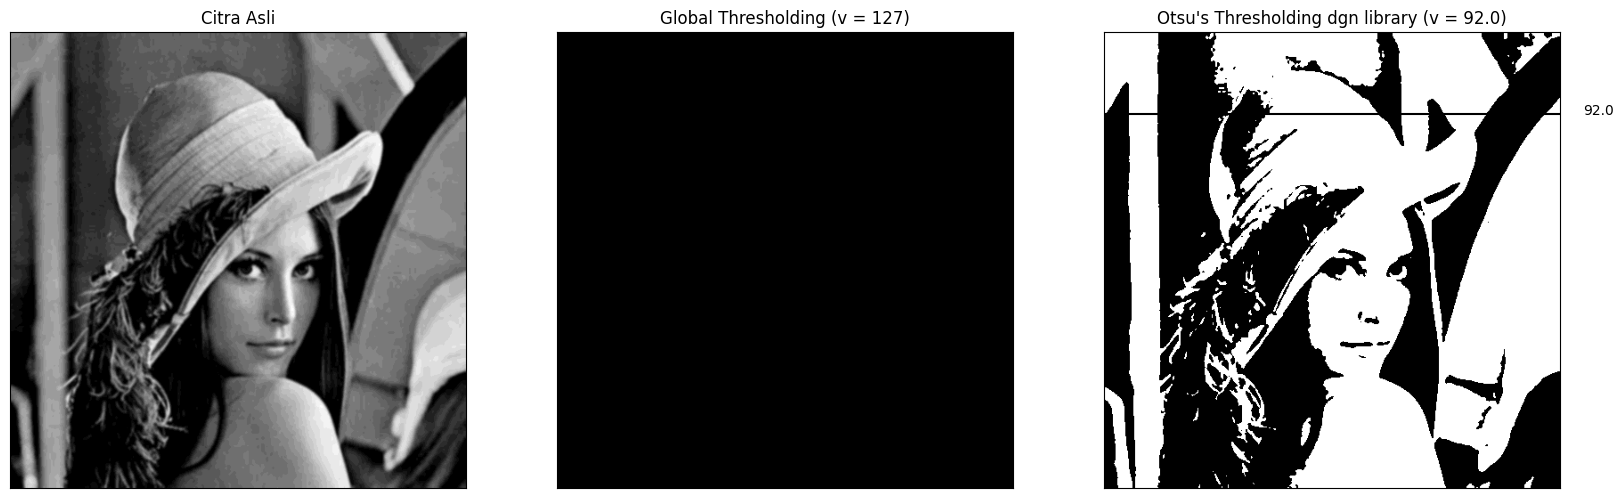

In [30]:
filename = ('/content/drive/MyDrive/PCVK/image_thres/lena_gs_lc2.jpg')
img = cv.imread(filename, 0)
blur = cv.GaussianBlur(img, (5, 5), 0)
thresh = 127

ret, th1 = cv.threshold(blur, thresh, 255, cv.THRESH_BINARY)

ret2, th2 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"

titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]

citra3 = [blur, th1, th2]

plt.figure(figsize=(20,8))

for i in range(len(citra3)):
    plt.subplot(1, 3, i+1), plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

    if i == 2:
        plt.axhline(y=ret2, color='black', linestyle='-')
        plt.text(th2.shape[1]*1.05, ret2, str(ret2))

plt.show()




A histogram from a segmented image

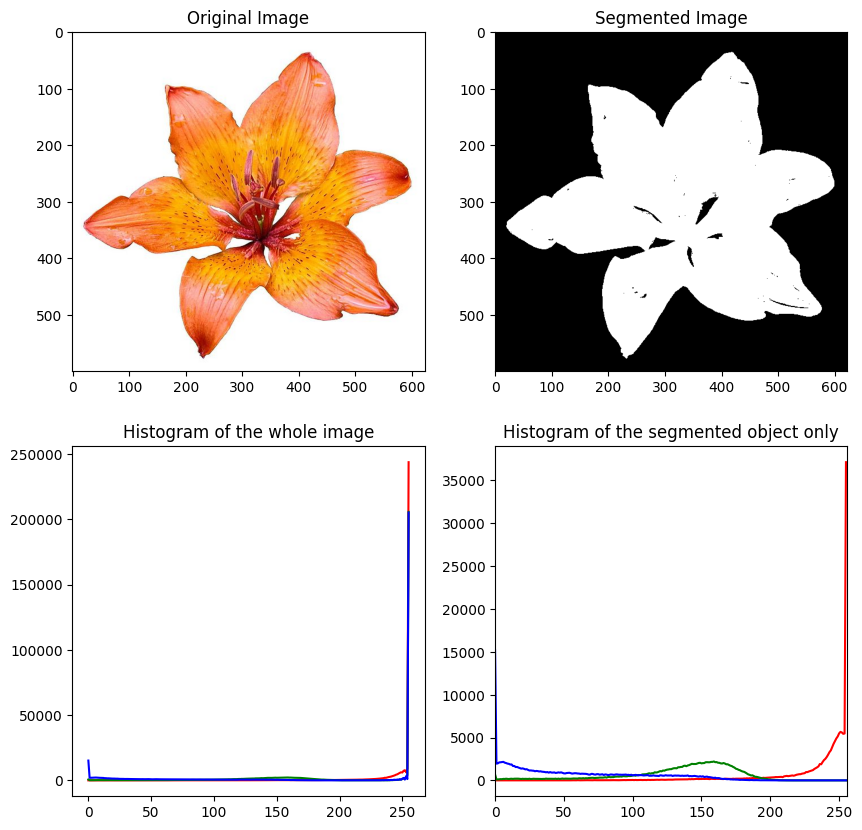

In [32]:
image_path = '/content/drive/MyDrive/PCVK/image_thres/lily.jpg'
image_BGR = cv.imread(image_path)
image_RGB = cv.cvtColor(image_BGR,cv.COLOR_BGR2RGB)
image_gray = cv.cvtColor(image_RGB,cv.COLOR_BGR2GRAY)

ret, mask = cv.threshold(image_gray, 200, 255, cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(image_RGB)
plt.title('Original Image')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Segmented Image')
colors = ('r', 'g', 'b')

for i, color in enumerate(colors):
    hist_all = cv.calcHist([image_RGB], [i], None, [256], [0,256])
    plt.subplot(2,2,3),plt.plot(hist_all, color=color)
    plt.title('Histogram of the whole image')
    hist_fg = cv.calcHist([image_RGB], [i], mask, [256], [0,256])
    plt.subplot(2,2,4),plt.plot(hist_fg, color=color)
    plt.title('Histogram of the segmented object only')
    plt.xlim([0,256])

plt.show()


Color Segmentation to Display Yellow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


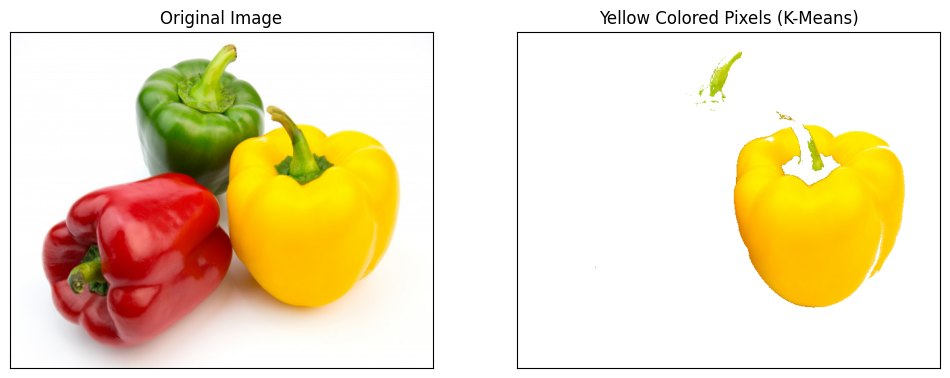

In [64]:
from sklearn.cluster import KMeans

# Load the image
img = cv.imread('/content/drive/MyDrive/PCVK/image_thres/peppers.jpg')

# Convert BGR to RGB
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = img.reshape((-1, 3))

# Define the number of clusters (colors) to be extracted
num_clusters = 5

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters)

# Fit the model to the pixel values
kmeans.fit(pixel_values)

# Get the cluster labels and cluster centers for each pixel
labels = kmeans.predict(pixel_values)
centers = kmeans.cluster_centers_

# Create an array with the same shape as the original image to store the segmented image
segmented_image = np.zeros_like(pixel_values)

# Assign each pixel to its corresponding cluster center
segmented_image[:, :] = centers[labels]

# Reshape the segmented image to its original shape
segmented_image = segmented_image.reshape(img.shape)

# Convert BGR to HSV
hsv = cv.cvtColor(segmented_image, cv.COLOR_RGB2HSV)

# Define the range of yellow color in HSV
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Threshold the HSV image to get only yellow colors
mask = cv.inRange(hsv, lower_yellow, upper_yellow)

# Set the background to white and the yellow pixels to their original color
output = np.full_like(img, (255, 255, 255), dtype=np.uint8)
output[mask == 255] = img[mask == 255]

# Show the original image and the segmented image
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(img)
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(output)
plt.title('Yellow Colored Pixels (K-Means)')
plt.xticks([]), plt.yticks([])
plt.show()



Binary Thresholding using Otsu's Thresholding 

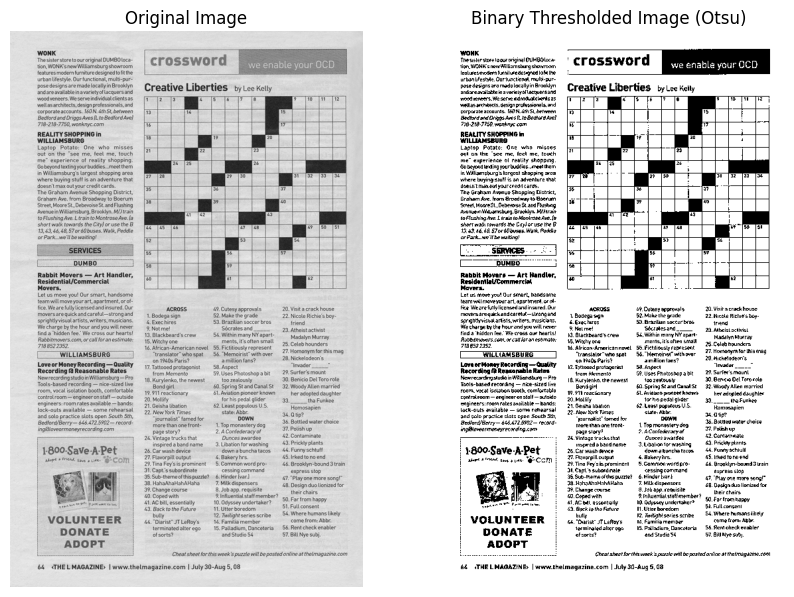

In [67]:
# Load the image in grayscale
img = cv.imread('/content/drive/MyDrive/PCVK/image_thres/crossword.jpg', 0)

# Apply binary thresholding with Otsu's method
th, threshed = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

# Display the original image and thresholded image side by side
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(threshed, cmap='gray')
plt.title('Binary Thresholded Image (Otsu)')
plt.axis('off')
plt.show()
